This project focuses on tracking customer retention by successfully extracting two key aspects:
1. 
Identifying customers who require marketing efforts or those who make offline purchases without engaging online2. .
Providing stakeholders with an overview of the percentage of customers purchasing premium and new products, facilitating insights into their buyi     ng behavior.

In [1]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go

In [2]:
user = pd.read_excel('user_purchase_data.xlsx', sheet_name='user_registration')


In [3]:
user.head()

,userID,is_subscriber
0,1,No
1,2,No
2,3,No
3,4,No
4,5,No


In [4]:
user.isna().sum()

userID           0
is_subscriber    0
dtype: int64

In [5]:
user["userID"].value_counts().sum()

201217

In [6]:
user.shape

(201217, 2)

In [7]:
user["userID"].duplicated().value_counts()

userID
False    201217
Name: count, dtype: int64

In [8]:
user["is_subscriber"].value_counts(normalize=True)*100

is_subscriber
No     99.21279
Yes     0.78721
Name: proportion, dtype: float64

<Axes: xlabel='is_subscriber'>

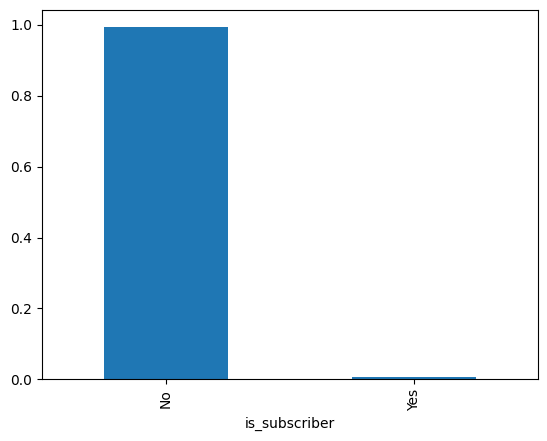

In [9]:
user["is_subscriber"].value_counts(normalize=True).plot(kind = 'bar')

Import second sheet 

In [10]:
mobile = pd.read_excel('user_purchase_data.xlsx', sheet_name='mobile_orders')

In [11]:
mobile.head()

,user_id,mobile_orders
0,2,5
1,4,2
2,5,5
3,6,31
4,7,10


In [12]:
mobile.shape

(141690, 2)

In [13]:
mobile.isna().sum()

user_id          0
mobile_orders    0
dtype: int64

In [14]:
mobile["user_id"].duplicated().value_counts()

user_id
False    141690
Name: count, dtype: int64

In [15]:
mobile.dtypes

user_id          int64
mobile_orders    int64
dtype: object

In [16]:
mobile["mobile_orders"].describe()

count    141690.000000
mean          9.565947
std          24.138480
min           1.000000
25%           2.000000
50%           4.000000
75%           8.000000
max        1174.000000
Name: mobile_orders, dtype: float64

<Axes: ylabel='Frequency'>

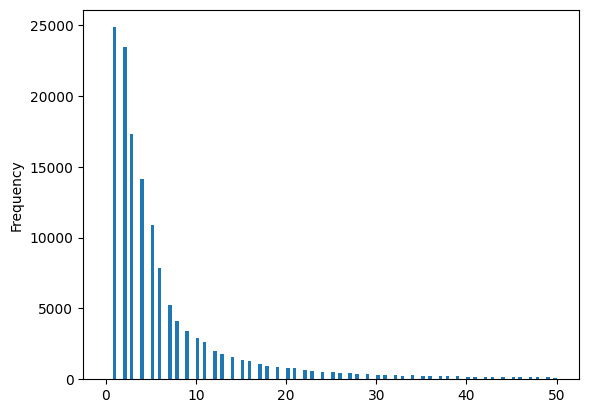

In [17]:
mobile["mobile_orders"].plot(kind='hist', bins = 130, range=[0,50])

In [18]:
mobile[mobile["user_id"].isin(user["userID"])] #if you wann find out how many id from mobile to user have this is the code 

,user_id,mobile_orders
0,2,5
1,4,2
2,5,5
3,6,31
4,7,10
...,...,...
141685,201211,2
141686,201212,31
141687,201213,2
141688,201215,5


In [19]:
mobile[~mobile["user_id"].isin(user["userID"])] #for Not is ~ add this symbol 1827 is not in user ID

,user_id,mobile_orders
91,201218,1
106,201219,17
150,201220,1
253,201221,3
301,201222,3
...,...,...
141390,203040,5
141411,203041,3
141492,203042,3
141532,203043,2


In [20]:
mobile.loc[~mobile["user_id"].isin(user["userID"]), 'user_id'].tolist() #this are the customer is we can target them for remarketing not vaialable in customer data set

[201218,
 201219,
 201220,
 201221,
 201222,
 201223,
 201224,
 201225,
 201226,
 201227,
 201228,
 201229,
 201230,
 201231,
 201232,
 201233,
 201234,
 201235,
 201236,
 201237,
 201238,
 201239,
 201240,
 201241,
 201242,
 201243,
 201244,
 201245,
 201246,
 201247,
 201248,
 201249,
 201250,
 201251,
 201252,
 201253,
 201254,
 201255,
 201256,
 201257,
 201258,
 201259,
 201260,
 201261,
 201262,
 201263,
 201264,
 201265,
 201266,
 201267,
 201268,
 201269,
 201270,
 201271,
 201272,
 201273,
 201274,
 201275,
 201276,
 201277,
 201278,
 201279,
 201280,
 201281,
 201282,
 201283,
 201284,
 201285,
 201286,
 201287,
 201288,
 201289,
 201290,
 201291,
 201292,
 201293,
 201294,
 201295,
 201296,
 201297,
 201298,
 201299,
 201300,
 201301,
 201302,
 201303,
 201304,
 201305,
 201306,
 201307,
 201308,
 201309,
 201310,
 201311,
 201312,
 201313,
 201314,
 201315,
 201316,
 201317,
 201318,
 201319,
 201320,
 201321,
 201322,
 201323,
 201324,
 201325,
 201326,
 201327,
 201328,
 

Extract Store Data 

In [21]:
store = pd.read_excel('user_purchase_data.xlsx', sheet_name='in_store_orders')

In [22]:
store.head()

,user_id,in_store_orders
0,5,26
1,6,1
2,26,5
3,27,11
4,31,2


In [23]:
store.shape

(53287, 2)

In [24]:
store.isna().sum()

user_id            0
in_store_orders    0
dtype: int64

In [25]:
store["in_store_orders"].value_counts()

in_store_orders
1      6528
2      4423
3      3328
4      3039
5      2573
       ... 
562       1
543       1
271       1
502       1
819       1
Name: count, Length: 530, dtype: int64

In [26]:
store["user_id"].nunique()

53287

In [27]:
store["in_store_orders"].describe()

count    53287.000000
mean        23.849701
std         55.010021
min          1.000000
25%          3.000000
50%          9.000000
75%         24.000000
max       1419.000000
Name: in_store_orders, dtype: float64

<Axes: ylabel='Frequency'>

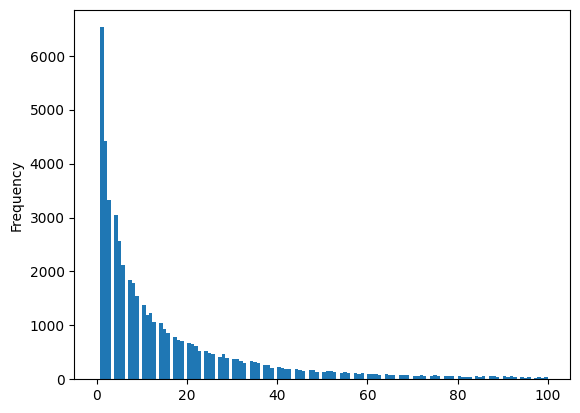

In [28]:
store["in_store_orders"].plot(kind='hist', bins = 130, range=[0,100])

In [29]:
store.loc[~mobile["user_id"].isin(user["userID"]), 'user_id'].tolist()
#you can create new variable and export into excel share them your new offers

[367,
 201222,
 582,
 1029,
 1199,
 1236,
 1264,
 1351,
 1563,
 1638,
 1726,
 2014,
 2305,
 2468,
 2506,
 2614,
 2793,
 3004,
 3183,
 3231,
 3748,
 3968,
 4268,
 4904,
 5217,
 5670,
 6025,
 6665,
 7110,
 8291,
 8629,
 8741,
 8910,
 9004,
 9291,
 9660,
 10305,
 11404,
 11915,
 12852,
 13127,
 13355,
 14204,
 14478,
 14605,
 14681,
 15833,
 16167,
 16194,
 16254,
 16603,
 17581,
 17759,
 17904,
 19106,
 19150,
 19380,
 19844,
 19879,
 19884,
 20453,
 203166,
 20812,
 21321,
 21398,
 21407,
 21420,
 21845,
 21876,
 22154,
 22289,
 22839,
 23963,
 24845,
 25155,
 25231,
 25675,
 26406,
 26672,
 203203,
 26963,
 27119,
 27211,
 27277,
 27542,
 27877,
 28248,
 28791,
 28960,
 29409,
 29590,
 30527,
 30965,
 31164,
 31225,
 31344,
 31523,
 31605,
 31842,
 32253,
 32621,
 32847,
 32889,
 33116,
 33574,
 33598,
 33646,
 33904,
 34162,
 203240,
 34379,
 34760,
 35279,
 35509,
 35583,
 35893,
 36408,
 36409,
 36465,
 36653,
 37093,
 37464,
 37553,
 37724,
 37878,
 38202,
 38445,
 38644,
 38708,
 

In [30]:
user.head()

,userID,is_subscriber
0,1,No
1,2,No
2,3,No
3,4,No
4,5,No


In [31]:
user.rename(columns={'userID':'user_id'}, inplace= True)

In [32]:
user.head()

,user_id,is_subscriber
0,1,No
1,2,No
2,3,No
3,4,No
4,5,No


In [33]:
#create the new column customer type in this data is_subscriber data Yes and No is paid or free
user["user_category"] = ['Premium' if i == 'Yes' else 'Free' for i in user['is_subscriber'].values]

In [34]:
user["user_category"].value_counts()

user_category
Free       199633
Premium      1584
Name: count, dtype: int64

In [35]:
user.columns

Index(['user_id', 'is_subscriber', 'user_category'], dtype='object')

In [36]:
mobile.columns

Index(['user_id', 'mobile_orders'], dtype='object')

In [37]:
store.columns

Index(['user_id', 'in_store_orders'], dtype='object')

In [38]:
orders = pd.merge(user, mobile,how='left', on='user_id').merge(store, how='left', on='user_id')

In [39]:
orders.head()

,user_id,is_subscriber,user_category,mobile_orders,in_store_orders
0,1,No,Free,NaN,NaN
1,2,No,Free,5.0,NaN
2,3,No,Free,NaN,NaN
3,4,No,Free,2.0,NaN
4,5,No,Free,5.0,26.0


In [40]:
orders.isna().sum() #now we can userstand those na values means not orders mobile and store 

user_id                 0
is_subscriber           0
user_category           0
mobile_orders       61354
in_store_orders    149484
dtype: int64

In [41]:
#ogic to replace the zero with Nan value
for col in orders.columns[2:]:
    orders[col] = orders[col].fillna(0)
orders.head()   

,user_id,is_subscriber,user_category,mobile_orders,in_store_orders
0,1,No,Free,0.0,0.0
1,2,No,Free,5.0,0.0
2,3,No,Free,0.0,0.0
3,4,No,Free,2.0,0.0
4,5,No,Free,5.0,26.0


In [42]:
#now create new column Total_orders
orders["total_orders"] = orders["mobile_orders"] + orders["in_store_orders"]
orders["total_orders"] = orders["total_orders"].astype(int)
orders.head()

,user_id,is_subscriber,user_category,mobile_orders,in_store_orders,total_orders
0,1,No,Free,0.0,0.0,0
1,2,No,Free,5.0,0.0,5
2,3,No,Free,0.0,0.0,0
3,4,No,Free,2.0,0.0,2
4,5,No,Free,5.0,26.0,31


In [43]:
column = ['mobile_orders', 'in_store_orders']
orders.drop(columns=column, inplace=True)

In [44]:
orders.total_orders.describe()

count    201217.000000
mean         12.952131
std          46.347289
min           0.000000
25%           1.000000
50%           3.000000
75%           9.000000
max        2279.000000
Name: total_orders, dtype: float64

In [45]:
100*orders[(orders["user_category"]=='Free') & (orders["total_orders"]>=1)].shape[0]/\
(orders["user_category"] == 'Free').sum()

75.16542856141018

In [46]:
#now we can under with changing least_order can userstand how many custoemr % 

catogry = 'Free'
least_order = 90
100*orders[(orders["user_category"]==catogry) & (orders["total_orders"]>=least_order)].shape[0]/\
(orders["user_category"] == catogry).sum()

2.5672108318764932

In [47]:
#now we can under with changing least_order can userstand how many custoemr % 

catogry = 'Premium'
least_order = 600
100*orders[(orders["user_category"]==catogry) & (orders["total_orders"]>=least_order)].shape[0]/\
(orders["user_category"] == catogry).sum()

2.335858585858586

In [48]:
order_bins = [0,1,2,3,4,5,6,7,8,10,12,15,20,25,30,35,40,45,50,55,60,70,80,90,100,120,140,160,180,200,250,300,350,
              400,450,500,550,600,700,800,900,1000,1100]

In [49]:
len(order_bins)

43

In [50]:
#this loop create columns by order_bins we create and allot the order as per the bens columns

for order_bins in order_bins:
    orders['orders >='+str(order_bins)] = [1 if i>=order_bins else 0 for
                                          i in orders['total_orders'].values]

In [51]:
orders.head()

,user_id,is_subscriber,user_category,total_orders,orders >=0,orders >=1,orders >=2,orders >=3,orders >=4,orders >=5,...,orders >=400,orders >=450,orders >=500,orders >=550,orders >=600,orders >=700,orders >=800,orders >=900,orders >=1000,orders >=1100
0,1,No,Free,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,No,Free,5,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
2,3,No,Free,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,No,Free,2,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,No,Free,31,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0


In [52]:
pd.set_option('display.max_columns', None)
orders.head(10)

,user_id,is_subscriber,user_category,total_orders,orders >=0,orders >=1,orders >=2,orders >=3,orders >=4,orders >=5,orders >=6,orders >=7,orders >=8,orders >=10,orders >=12,orders >=15,orders >=20,orders >=25,orders >=30,orders >=35,orders >=40,orders >=45,orders >=50,orders >=55,orders >=60,orders >=70,orders >=80,orders >=90,orders >=100,orders >=120,orders >=140,orders >=160,orders >=180,orders >=200,orders >=250,orders >=300,orders >=350,orders >=400,orders >=450,orders >=500,orders >=550,orders >=600,orders >=700,orders >=800,orders >=900,orders >=1000,orders >=1100
0,1,No,Free,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,No,Free,5,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,3,No,Free,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,No,Free,2,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,5,No,Free,31,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,6,No,Free,32,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,7,No,Free,10,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,8,No,Free,3,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,9,No,Free,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,10,No,Free,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [53]:
orders.head()

,user_id,is_subscriber,user_category,total_orders,orders >=0,orders >=1,orders >=2,orders >=3,orders >=4,orders >=5,orders >=6,orders >=7,orders >=8,orders >=10,orders >=12,orders >=15,orders >=20,orders >=25,orders >=30,orders >=35,orders >=40,orders >=45,orders >=50,orders >=55,orders >=60,orders >=70,orders >=80,orders >=90,orders >=100,orders >=120,orders >=140,orders >=160,orders >=180,orders >=200,orders >=250,orders >=300,orders >=350,orders >=400,orders >=450,orders >=500,orders >=550,orders >=600,orders >=700,orders >=800,orders >=900,orders >=1000,orders >=1100
0,1,No,Free,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,No,Free,5,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,3,No,Free,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,No,Free,2,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,5,No,Free,31,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [54]:
total = orders.drop(columns=['user_id', 'total_orders'])

In [55]:
total = orders.drop(columns=['user_id', 'total_orders','is_subscriber'])

In [56]:
total.head()

,user_category,orders >=0,orders >=1,orders >=2,orders >=3,orders >=4,orders >=5,orders >=6,orders >=7,orders >=8,orders >=10,orders >=12,orders >=15,orders >=20,orders >=25,orders >=30,orders >=35,orders >=40,orders >=45,orders >=50,orders >=55,orders >=60,orders >=70,orders >=80,orders >=90,orders >=100,orders >=120,orders >=140,orders >=160,orders >=180,orders >=200,orders >=250,orders >=300,orders >=350,orders >=400,orders >=450,orders >=500,orders >=550,orders >=600,orders >=700,orders >=800,orders >=900,orders >=1000,orders >=1100
0,Free,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Free,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Free,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Free,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Free,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [57]:
total.columns[1:]

Index(['orders >=0', 'orders >=1', 'orders >=2', 'orders >=3', 'orders >=4',
       'orders >=5', 'orders >=6', 'orders >=7', 'orders >=8', 'orders >=10',
       'orders >=12', 'orders >=15', 'orders >=20', 'orders >=25',
       'orders >=30', 'orders >=35', 'orders >=40', 'orders >=45',
       'orders >=50', 'orders >=55', 'orders >=60', 'orders >=70',
       'orders >=80', 'orders >=90', 'orders >=100', 'orders >=120',
       'orders >=140', 'orders >=160', 'orders >=180', 'orders >=200',
       'orders >=250', 'orders >=300', 'orders >=350', 'orders >=400',
       'orders >=450', 'orders >=500', 'orders >=550', 'orders >=600',
       'orders >=700', 'orders >=800', 'orders >=900', 'orders >=1000',
       'orders >=1100'],
      dtype='object')

In [58]:
total = total.groupby('user_category')[total.columns[1:]].sum().reset_index()
total.head()

,user_category,orders >=0,orders >=1,orders >=2,orders >=3,orders >=4,orders >=5,orders >=6,orders >=7,orders >=8,orders >=10,orders >=12,orders >=15,orders >=20,orders >=25,orders >=30,orders >=35,orders >=40,orders >=45,orders >=50,orders >=55,orders >=60,orders >=70,orders >=80,orders >=90,orders >=100,orders >=120,orders >=140,orders >=160,orders >=180,orders >=200,orders >=250,orders >=300,orders >=350,orders >=400,orders >=450,orders >=500,orders >=550,orders >=600,orders >=700,orders >=800,orders >=900,orders >=1000,orders >=1100
0,Free,199633,150055,127507,105052,88675,76665,66874,59841,54505,46510,40463,34116,26777,21938,18467,15787,13669,11960,10551,9377,8452,6985,5922,5125,4442,3432,2761,2226,1805,1497,952,668,501,377,296,242,205,165,118,86,73,60,50
1,Premium,1584,1271,1162,1089,1032,972,915,863,804,741,692,635,548,489,455,410,380,362,330,317,307,277,257,227,201,171,153,137,113,105,90,73,58,51,45,43,41,37,29,24,19,12,7


In [59]:
total

,user_category,orders >=0,orders >=1,orders >=2,orders >=3,orders >=4,orders >=5,orders >=6,orders >=7,orders >=8,orders >=10,orders >=12,orders >=15,orders >=20,orders >=25,orders >=30,orders >=35,orders >=40,orders >=45,orders >=50,orders >=55,orders >=60,orders >=70,orders >=80,orders >=90,orders >=100,orders >=120,orders >=140,orders >=160,orders >=180,orders >=200,orders >=250,orders >=300,orders >=350,orders >=400,orders >=450,orders >=500,orders >=550,orders >=600,orders >=700,orders >=800,orders >=900,orders >=1000,orders >=1100
0,Free,199633,150055,127507,105052,88675,76665,66874,59841,54505,46510,40463,34116,26777,21938,18467,15787,13669,11960,10551,9377,8452,6985,5922,5125,4442,3432,2761,2226,1805,1497,952,668,501,377,296,242,205,165,118,86,73,60,50
1,Premium,1584,1271,1162,1089,1032,972,915,863,804,741,692,635,548,489,455,410,380,362,330,317,307,277,257,227,201,171,153,137,113,105,90,73,58,51,45,43,41,37,29,24,19,12,7


In [60]:
melted_df = pd.melt(total, id_vars='user_category', value_vars=total.columns[1:],
                   var_name='orders_bins', value_name='registered_users')

In [61]:
melted_df.head()

,user_category,orders_bins,registered_users
0,Free,orders >=0,199633
1,Premium,orders >=0,1584
2,Free,orders >=1,150055
3,Premium,orders >=1,1271
4,Free,orders >=2,127507


In [63]:
melted_df['order_counts'] = [int(i.split('>=')[1]) for i in melted_df['orders_bins'].values]

In [65]:
melted_df.drop(columns='orders_bins')

,user_category,registered_users,order_counts
0,Free,199633,0
1,Premium,1584,0
2,Free,150055,1
3,Premium,1271,1
4,Free,127507,2
...,...,...,...
81,Premium,19,900
82,Free,60,1000
83,Premium,12,1000
84,Free,50,1100


In [67]:
baseline = 0
melted_df['category_total'] = \
[melted_df.loc[(melted_df['user_category']==i) & 
 (melted_df['order_counts']==baseline), 'registered_users'].max()
 for i in melted_df['user_category']]

In [68]:
melted_df #catogory total contain top values from meas 100 % vaues total from each free and premium

,user_category,orders_bins,registered_users,order_counts,category_total
0,Free,orders >=0,199633,0,199633
1,Premium,orders >=0,1584,0,1584
2,Free,orders >=1,150055,1,199633
3,Premium,orders >=1,1271,1,1584
4,Free,orders >=2,127507,2,199633
...,...,...,...,...,...
81,Premium,orders >=900,19,900,1584
82,Free,orders >=1000,60,1000,199633
83,Premium,orders >=1000,12,1000,1584
84,Free,orders >=1100,50,1100,199633


In [69]:
#now calculate the % column
melted_df['%_users'] = melted_df['registered_users'] / melted_df['category_total']

In [70]:
melted_df.head()

,user_category,orders_bins,registered_users,order_counts,category_total,%_users
0,Free,orders >=0,199633,0,199633,1.000000
1,Premium,orders >=0,1584,0,1584,1.000000
2,Free,orders >=1,150055,1,199633,0.751654
3,Premium,orders >=1,1271,1,1584,0.802399
4,Free,orders >=2,127507,2,199633,0.638707


In [73]:
melted_df.drop(columns=['registered_users', 'category_total'], inplace=True)

In [77]:
melted_df.drop(columns=['orders_bins'], inplace=True)

In [78]:
melted_df

,user_category,order_counts,%_users
0,Free,0,1.000000
1,Premium,0,1.000000
2,Free,1,0.751654
3,Premium,1,0.802399
4,Free,2,0.638707
...,...,...,...
81,Premium,900,0.011995
82,Free,1000,0.000301
83,Premium,1000,0.007576
84,Free,1100,0.000250


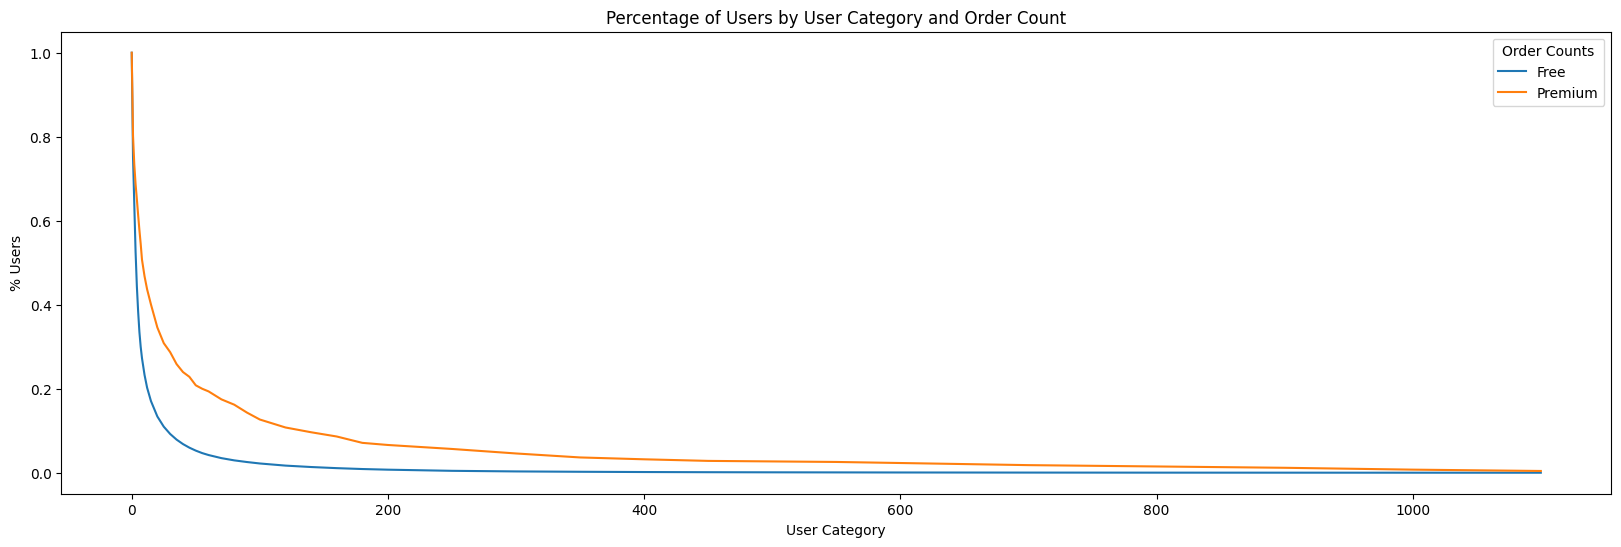

In [81]:
import matplotlib.pyplot as plt
pivot_df = melted_df.pivot(index='order_counts', columns='user_category', values='%_users')

# Plotting
pivot_df.plot(kind='line', figsize=(20, 6))
plt.title('Percentage of Users by User Category and Order Count')
plt.xlabel('User Category')
plt.ylabel('% Users')
plt.xticks(rotation=0)  # Rotate x-axis labels to be horizontal
plt.legend(title='Order Counts')

plt.show()

In [83]:
melted_df.columns

Index(['user_category', 'order_counts', '%_users'], dtype='object')

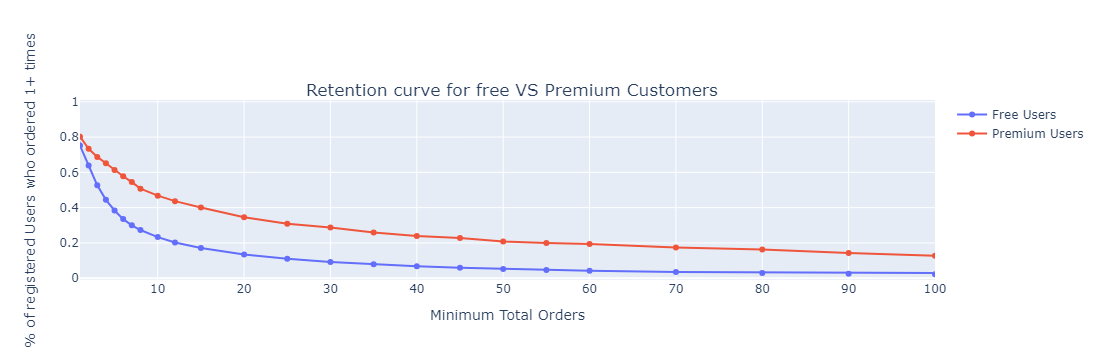

In [105]:
import plotly.graph_objects as go  

max_x_val = 100
fig = go.Figure()  

for i in melted_df['user_category'].unique():
    fig.add_trace(go.Scatter(x=melted_df.loc[melted_df['user_category']==i, 'order_counts'],
                             y=melted_df.loc[melted_df['user_category']==i, '%_users'],
                             name=i+' Users',
                             hovertemplate='<b>%{y:.2%}</b>'))

fig.update_traces(mode='markers+lines')
fig.update_layout(hovermode='x unified',
                  xaxis_title='Minimum Total Orders',
                  yaxis_title='% of registered Users who ordered ' + str(baseline) + '+ times',
                  title={'text': 'Retention curve for free VS Premium Customers',
                         'y': 0.75, 'x': 0.465, 'xanchor': 'center', 'yanchor': 'middle'})
fig.update_xaxes(range=[baseline, max_x_val])
fig.update_yaxes(range=[-0.01, 1.01])

fig.show()  